In [3]:
import subprocess
import os
from Parse import AlipidLine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.mpl_style = 'default'

maindir = os.getcwd()

In [4]:
myl = [ x.rstrip('\n') for x in open('list','r').readlines() ]
print myl

['1oh0', '1oif', '1rpg', '1w3j', '1w6y', '2nlr', '3veu', '2jaj', '2jie', '4hp0', '2gke', '1xpz', '4bcd', '3nzi', '2qxg', '1ju3', '1ogx', '1oim', '1rbo', '1u1b', '1h2j', '1oex', '1p6o', '3vgc', '6cpa', '1ney', '1dqx', '1jcl', '4fua', '1c2t', '1tqh', '2fj0', '1eh5', '1hqd', '1lpm', '4x95', '3ia2']


In [ ]:
## read in pid information for plots

In [8]:
#os.chdir('allatom')
maindir = os.getcwd()
print maindir

/Users/steve/Desktop/benchmark/allatom


In [11]:
listof = []
for x in myl:
    #print x
    for di in ['results_model','results_upweightmodel']:
        #print maindir+'/'+di
        os.chdir( maindir+'/'+di )
        #try:
        with open('results.%s' %x,'r') as fh:
                fh.next()
                for line in fh:
                    line = line.rstrip('\n')
                    y = line.split()
                    name = y[0].split('.')[0]
                    order = y[0].split('.')[1]
                    #if di == 'results_model':
                    s = pd.Series([ name, order ,y[1],y[2],di ], index = ['name','order','rmsd_ca','rmsd_all_heavy_atom_active_8','type'])
                    #else:
                    #    s = pd.Series([ name, order ,y[1],y[2],di ], index = ['name','order_up','rmsd_ca_up','rmsd_all_heavy_atom_active_8_up','type_up'])
                    listof.append(s)
        #except:
        #    print 'error'
        os.chdir(maindir)
        
data= pd.DataFrame(listof)

In [10]:
print data

     name order            rmsd_ca rmsd_all_heavy_atom_active_8  \
0    1oh0     1   1.17110804625363             1.53616966117255   
1    1oh0     2   1.21287397531648             1.53543731669136   
2    1oh0     3   1.22374795117295             1.61314402246337   
3    1oh0     4   1.10501831659027              1.6978411326234   
4    1oh0     5   1.13688148194964             1.64216352753396   
5    1oh0     6   1.44602032350863             1.45087652576753   
6    1oh0     7   1.15813780181807             1.47992601952118   
7    1oh0     8   1.25197955254868             1.64245191356462   
8    1oh0     9   1.04022864409706             1.14964576141705   
9    1oh0    10   1.36373281547376             1.59111237087271   
10   1oh0     1   1.14181355045384             1.40211479973214   
11   1oh0     2   1.20284735191129             1.31760501721698   
12   1oh0     3   1.19560313816918             1.61619021733355   
13   1oh0     4     1.286305357215             1.6310618527333

In [12]:
data.order = data.order.astype(int)

In [13]:
low = data[ data.order == 1]

In [14]:
up = low[ low.type == 'results_upweightmodel' ].add_suffix('up')
notup = low[ low.type == 'results_model' ]

In [15]:
up.nameup = up.nameup.astype('string')
notup.name = notup.name.astype('string')

up.rmsd_all_heavy_atom_active_8up = up.rmsd_all_heavy_atom_active_8up.astype('float')
notup.rmsd_all_heavy_atom_active_8 = notup.rmsd_all_heavy_atom_active_8.astype('float')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/generic.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [16]:
merged_inner = pd.merge(left=up,right=notup, left_on='nameup', right_on='name')

In [17]:
print merged_inner

   nameup  orderup          rmsd_caup  rmsd_all_heavy_atom_active_8up  \
0    1oh0        1   1.14181355045384                        1.402115   
1    1oif        1   4.89154364740871                        3.891616   
2    1rpg        1   1.26647507075296                        2.002922   
3    1w3j        1   4.42028943824191                        4.013211   
4    1w6y        1   1.44379410280356                        1.874038   
5    2nlr        1   0.72833930203504                        1.223767   
6    3veu        1   14.3634365246062                        7.927274   
7    2jaj        1   2.21590786063865                        2.966752   
8    2jie        1   1.66024609317042                        1.455425   
9    4hp0        1  0.670254670959973                        1.138668   
10   2gke        1  0.913763643591911                        1.659311   
11   1xpz        1   3.13747083698292                        3.749093   
12   4bcd        1   2.57315727364838              

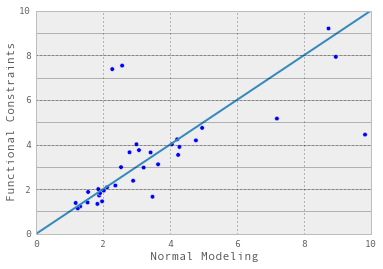

In [18]:
plt.scatter( merged_inner.rmsd_all_heavy_atom_active_8, merged_inner.rmsd_all_heavy_atom_active_8up)
x = np.linspace(0,10)
y = x
plt.plot(x, y, linewidth=2.0)
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('Normal Modeling')
plt.ylabel('Functional Constraints')

for i in xrange(1,10):
    x2 = np.linspace(0,10)
    y2 = np.ones( len(x2) )*i
    plt.plot(x2,y2,linewidth=.5, color='black', alpha=.5)

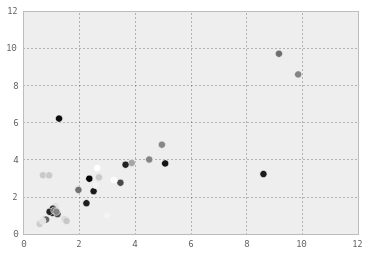

In [205]:
merge2 = pd.merge(left=df,right=merged_inner, left_on='name', right_on='nameup')
pl = plt.scatter( merge2.rmsd_all_heavy_atom_active_8, merge2.rmsd_all_heavy_atom_active_8up, c=merge2.pid, s=50)
cmape = pl.get_cmap()

In [19]:
merge2['difference'] = merge2.rmsd_all_heavy_atom_active_8-merge2.rmsd_all_heavy_atom_active_8up
merge2[['nameup','rmsd_all_heavy_atom_active_8','rmsd_all_heavy_atom_active_8up','difference','pid']]

NameError: name 'merge2' is not defined

In [203]:
merge2.rmsd_all_heavy_atom_active_8 - merge2.rmsd_all_heavy_atom_active_8up

0    -0.081981
1    -2.441124
2    -0.324000
3    -0.318368
4    -0.287475
5    -0.022621
6     1.289154
7     0.234561
8     0.052776
9     0.057078
10    2.029523
11   -0.876609
12    0.739398
13   -0.378119
14   -0.514674
15    1.307993
16   -0.240116
17   -2.212328
18    0.682965
19   -0.001229
20    0.861601
21    0.082309
22   -4.909519
23    0.524447
24   -0.138696
25   -0.047552
26    0.176531
27    0.005068
28    0.625043
29    5.399661
30   -0.592190
31   -0.017639
32    0.366368
33    0.180012
dtype: float64

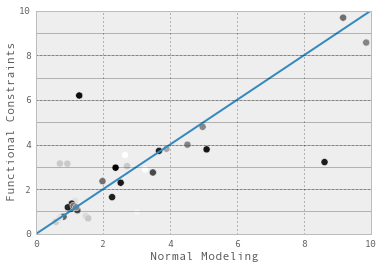

In [204]:
plt.scatter( merge2.rmsd_all_heavy_atom_active_8, merge2.rmsd_all_heavy_atom_active_8up, c=merge2.pid, s=50)
plt.gray()
x = np.linspace(0,10)
y = x
plt.plot(x, y, linewidth=2.0)
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('Normal Modeling')
plt.ylabel('Functional Constraints')

for i in xrange(1,10):
    x2 = np.linspace(0,10)
    y2 = np.ones( len(x2) )*i
    plt.plot(x2,y2,linewidth=.5, color='black', alpha=.5)

In [26]:
print data[  data.order < 6  ]

     name  order            rmsd_ca rmsd_all_heavy_atom_active_8  \
0    1oh0      1   1.17110804625363             1.53616966117255   
1    1oh0      2   1.21287397531648             1.53543731669136   
2    1oh0      3   1.22374795117295             1.61314402246337   
3    1oh0      4   1.10501831659027              1.6978411326234   
4    1oh0      5   1.13688148194964             1.64216352753396   
10   1oh0      1   1.14181355045384             1.40211479973214   
11   1oh0      2   1.20284735191129             1.31760501721698   
12   1oh0      3   1.19560313816918             1.61619021733355   
13   1oh0      4     1.286305357215             1.63106185273332   
14   1oh0      5   1.31864966992754              1.6402132419505   
20   1oif      1   3.04338736125237             4.27869115938895   
21   1oif      2   3.65407558989503             3.94123634067384   
22   1oif      3   3.75898231118022             3.65101244327688   
23   1oif      4   4.63981287241102             

In [27]:
print data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 663
Data columns (total 5 columns):
name                            664 non-null object
order                           664 non-null int64
rmsd_ca                         664 non-null object
rmsd_all_heavy_atom_active_8    664 non-null object
type                            664 non-null object
dtypes: int64(1), object(4)
memory usage: 31.1+ KB
None
